<a href="https://colab.research.google.com/github/will-mccormack/CS-M148-Proj/blob/main/Week_2_Spotify_Data_Cleaning_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install scikit-lego

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 4.5 MB/s eta 0:00:00


In [9]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import time
import plotly.express as px
import plotly.graph_objects as go

In [10]:
raw_data = pd.read_csv("https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset/resolve/main/dataset.csv")

In [12]:
print(raw_data.columns)

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [27]:
genre_popularity = raw_data.groupby('track_genre')['popularity'].mean().reset_index()
genre_popularity = genre_popularity.sort_values('popularity', ascending=False)

fig = px.bar(genre_popularity, x='track_genre', y='popularity', title='Average Popularity by Genre')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [26]:
comedy_tracks_count = raw_data[raw_data['track_genre'] == 'comedy'].shape[0]
print(f"number of tracks in the comedy {comedy_tracks_count}")

comedy_tracks = raw_data[raw_data['track_genre'] == 'comedy']



number of tracks in the comedy 1000


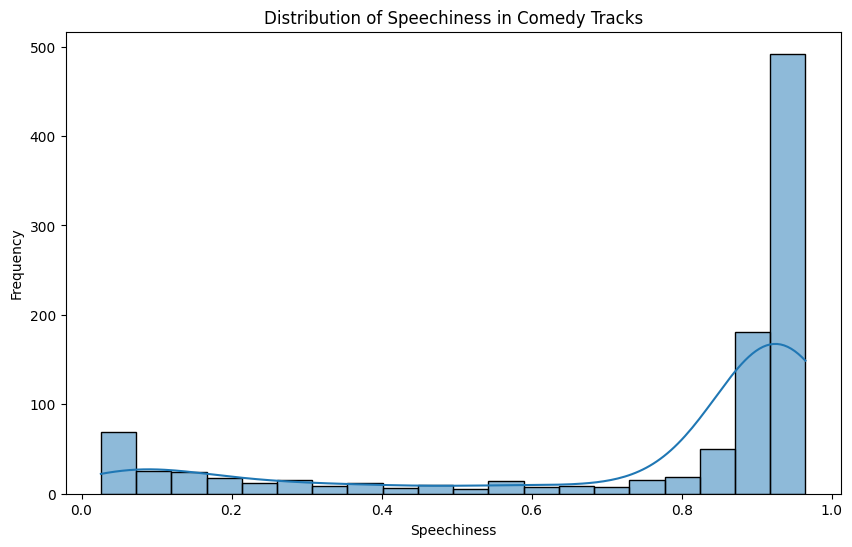

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
18001,18001,6dbSBQXCctYSVryynHXaZ4,Lil Dicky;Chris Brown,Freaky Friday (feat. Chris Brown),Freaky Friday (feat. Chris Brown),45,216631,True,0.755,0.599,...,-5.042,1,0.224,0.1470,0.000000,0.1090,0.755,133.123,4,comedy
18002,18002,7lakl3bPRdQqUGX9m755jX,Lil Dicky,Earth,Earth,40,281500,True,0.694,0.664,...,-4.649,1,0.050,0.6390,0.000000,0.0929,0.676,95.941,4,comedy
18004,18004,5PEleSkK4p4E1sx3x7cOLt,The Lonely Island;Akon,Turtleneck & Chain (Explicit Version),I Just Had Sex,63,166560,True,0.615,0.811,...,-4.316,1,0.144,0.0188,0.000000,0.1960,0.808,167.995,4,comedy
18005,18005,7MkysLvt3L8UFji2PceoFU,Lil Dicky;Brendon Urie,Professional Rapper,Molly (feat. Brendon Urie of Panic at the Disco),66,244339,True,0.829,0.514,...,-6.694,1,0.037,0.2030,0.000157,0.1150,0.397,114.955,4,comedy
18006,18006,1TkWsnheqK0gBtvh07BtNX,Lil Dicky;Fetty Wap;Rich Homie Quan,Professional Rapper,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,64,290835,True,0.858,0.697,...,-5.361,1,0.230,0.1140,0.000000,0.2240,0.364,98.013,4,comedy


In [33]:
comedy_tracks = raw_data[raw_data['track_genre'] == 'comedy']

plt.figure(figsize=(10, 6))
sns.histplot(comedy_tracks['speechiness'], kde=True, bins=20)
plt.title('Distribution of Speechiness in Comedy Tracks')
plt.xlabel('Speechiness')
plt.ylabel('Frequency')
plt.show()

comedy_tracks[comedy_tracks['speechiness'] < 0.3].head(5)

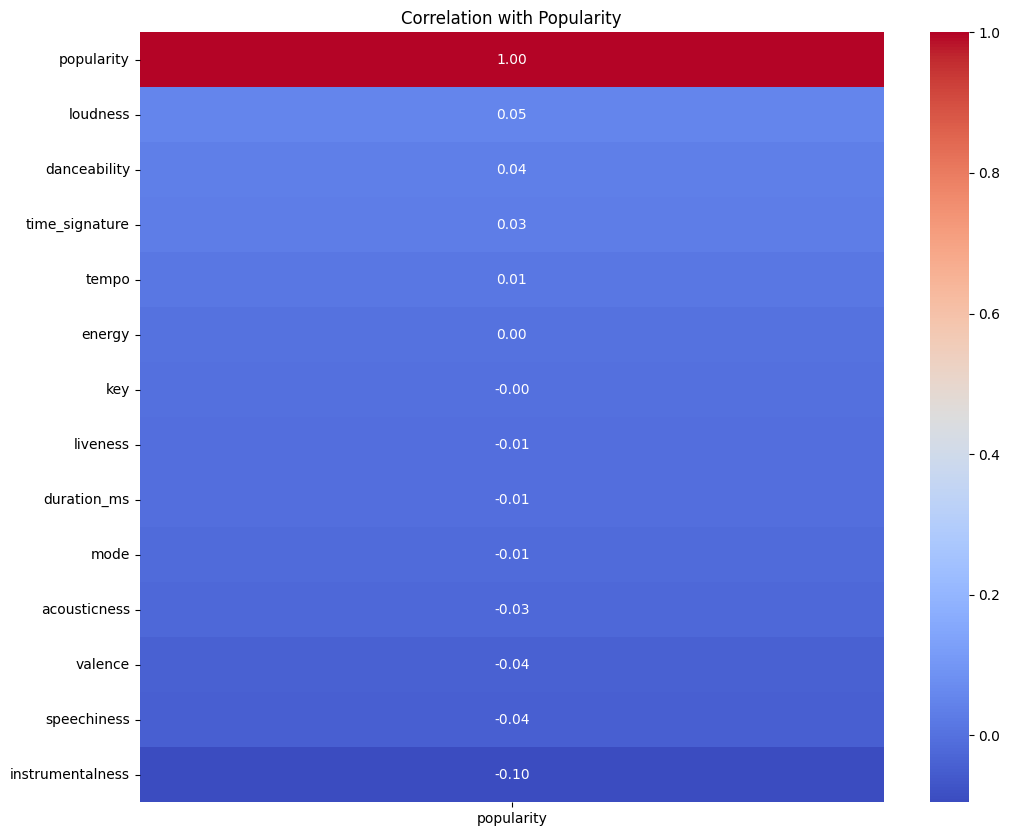

In [19]:
import seaborn as sns

numerical_cols = raw_data.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('Unnamed: 0') # Exclude 'Unnamed: 0' as requested

correlation_matrix = raw_data[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['popularity']].sort_values(by='popularity', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Popularity')
plt.show()

In [21]:
# Calculate the number of missing values in each column
missing_values = raw_data.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(raw_data)) * 100

# Create a DataFrame to display the results
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display missing info for all columns
display(missing_info)

,Missing Values,Percentage
Unnamed: 0,0,0.000000
track_id,0,0.000000
artists,1,0.000877
album_name,1,0.000877
track_name,1,0.000877
popularity,0,0.000000
duration_ms,0,0.000000
explicit,0,0.000000
danceability,0,0.000000
energy,0,0.000000
